In [345]:
import pandas as pd
import numpy as np
from datetime import date


import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('dark_background')
sns.set_style('darkgrid')


from google.colab import drive
import json
import requests

#drive.mount('/content/drive')

%load_ext google.colab.data_table


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


### Provincie Analysis

In [346]:
df_p = pd.read_json('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-province.json')
df_p

data stato  codice_regione  ... totale_casi  note_it note_en
0     2020-02-24T18:00:00   ITA              13  ...           0                 
1     2020-02-24T18:00:00   ITA              13  ...           0                 
2     2020-02-24T18:00:00   ITA              13  ...           0                 
3     2020-02-24T18:00:00   ITA              13  ...           0                 
4     2020-02-24T18:00:00   ITA              13  ...           0                 
...                   ...   ...             ...  ...         ...      ...     ...
5755  2020-04-08T17:00:00   ITA               5  ...        1863                 
5756  2020-04-08T17:00:00   ITA               5  ...        1630                 
5757  2020-04-08T17:00:00   ITA               5  ...        2920                 
5758  2020-04-08T17:00:00   ITA               5  ...        1782                 
5759  2020-04-08T17:00:00   ITA               5  ...         325                 

[5760 rows x 12 columns]

In [0]:
df_p.data = pd.to_datetime(df_p.data)

In [348]:
# Data from Lombardia provinces

lom_p =  df_p[df_p.denominazione_regione == 'Lombardia']
lom_p.reset_index(drop=True, inplace=True)
lom_p.data = lom_p.data.dt.date

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [349]:
lom_p.head()

data stato  codice_regione  ... totale_casi  note_it note_en
0  2020-02-24   ITA               3  ...           0                 
1  2020-02-24   ITA               3  ...           0                 
2  2020-02-24   ITA               3  ...           0                 
3  2020-02-24   ITA               3  ...           0                 
4  2020-02-24   ITA               3  ...           0                 

[5 rows x 12 columns]

In [0]:
# DF with regional&province data

polenta_p = df_p[(df_p.denominazione_regione == 'Lombardia') | (df_p.denominazione_regione == 'Veneto') | (df_p.denominazione_regione == 'Emilia Romagna') | (df_p.denominazione_regione == 'Piemonte')]

In [0]:
lom_pc = lom_p[~(lom_p.denominazione_provincia == 'In fase di definizione/aggiornamento')]

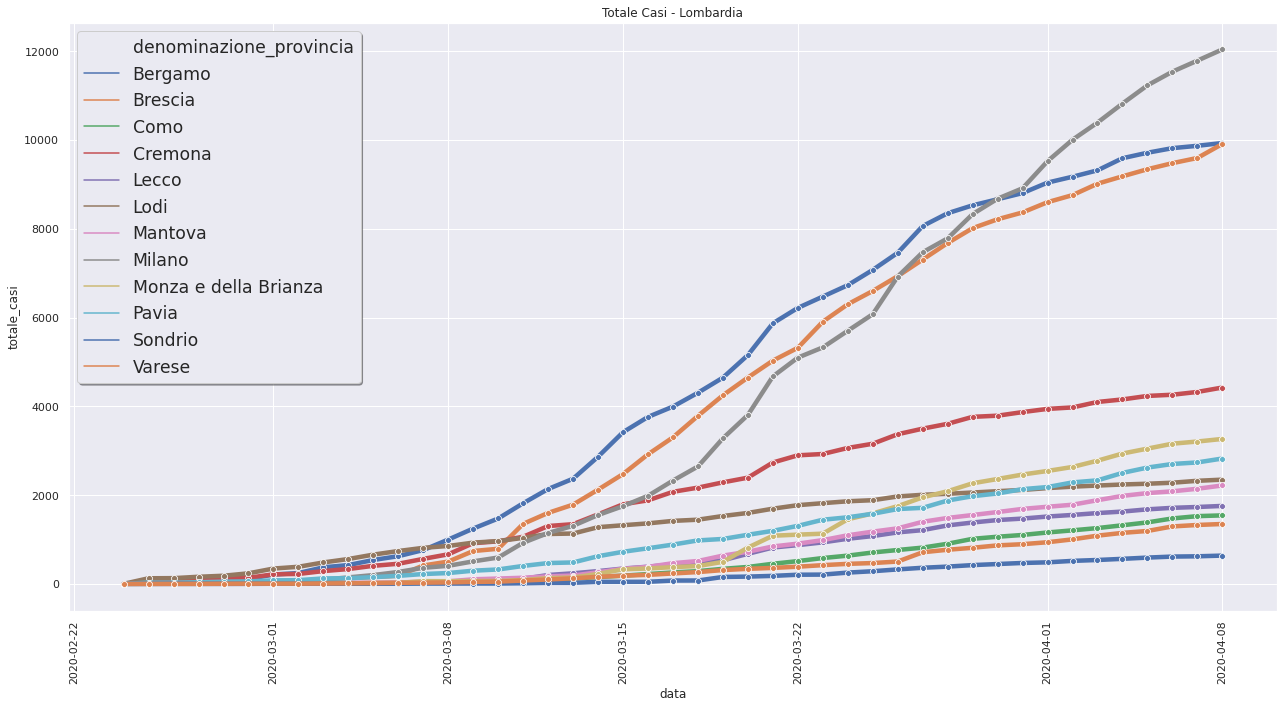

In [352]:
plt.figure(figsize=(18,10))

plt.title('Totale Casi - Lombardia')
sns.lineplot(data=lom_pc, x=lom_pc['data'], y='totale_casi', palette='deep', hue='denominazione_provincia', lw=4.5, n_boot=0, marker='8')
plt.legend(shadow=True, fontsize='x-large')
plt.xticks(rotation=90)
plt.tight_layout()

In [353]:
px.line(lom_pc, x=lom_pc['data'],y='totale_casi',line_group='denominazione_provincia', color='denominazione_provincia', log_y=False, line_shape='linear')

In [354]:
df_p.head(2)

data stato  codice_regione  ... totale_casi  note_it note_en
0 2020-02-24 18:00:00   ITA              13  ...           0                 
1 2020-02-24 18:00:00   ITA              13  ...           0                 

[2 rows x 12 columns]

In [0]:
df_p['pct_crescita'] = df_p.groupby('denominazione_provincia')['totale_casi'].transform(lambda x: (x.pct_change()*100).round(1))

In [0]:
df_pc = df_p[~(df_p.denominazione_provincia == 'In fase di definizione/aggiornamento')]
df_pc.set_index('data', inplace=True)

In [357]:
prov_latest =  df_pc.sort_index().groupby('denominazione_provincia').tail(1)
prov_latest.head()

stato  codice_regione  ... note_en  pct_crescita
data                                       ...                      
2020-04-08 17:00:00   ITA              13  ...                   5.2
2020-04-08 17:00:00   ITA              13  ...                   4.2
2020-04-08 17:00:00   ITA              13  ...                   2.0
2020-04-08 17:00:00   ITA              13  ...                   3.7
2020-04-08 17:00:00   ITA              17  ...                   0.7

[5 rows x 12 columns]

In [358]:
prov_latest.sort_values(by='pct_crescita', ascending=False).tail(20)

stato  codice_regione  ... note_en  pct_crescita
data                                       ...                      
2020-04-08 17:00:00   ITA               3  ...                   1.1
2020-04-08 17:00:00   ITA               8  ...                   1.1
2020-04-08 17:00:00   ITA               3  ...                   1.1
2020-04-08 17:00:00   ITA              10  ...                   0.9
2020-04-08 17:00:00   ITA              18  ...                   0.9
2020-04-08 17:00:00   ITA               8  ...                   0.9
2020-04-08 17:00:00   ITA               8  ...                   0.8
2020-04-08 17:00:00   ITA              15  ...                   0.8
2020-04-08 17:00:00   ITA              17  ...                   0.7
2020-04-08 17:00:00   ITA               3  ...                   0.6
2020-04-08 17:00:00   ITA               9  ...                   0.5
2020-04-08 17:00:00   ITA              12  ...                   0.4
2020-04-08 17:00:00   ITA              12  ...                   0.4
2020-04-08 17:00:00   ITA              11  ...                   0.4
2020-04-08 17:00:00   ITA               9  ...                   0.3
2020-04-08 17:00:00   ITA               9  ...                   0.3
2020-04-08 17:00:00   ITA               9  ...                   0.0
2020-04-08 17:00:00   ITA              14  ...                   0.0
2020-04-08 17:00:00   ITA              14  ...                   0.0
2020-04-08 17:00:00   ITA              20  ...                   0.0

[20 rows x 12 columns]

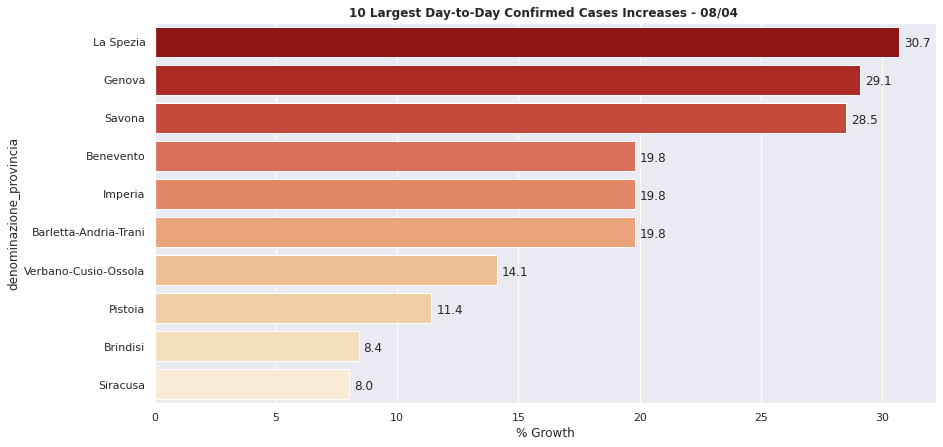

In [359]:
plt.figure(figsize=(14,7))
plt.title('10 Largest Day-to-Day Confirmed Cases Increases - 08/04 ', fontweight='bold')
ax=sns.barplot(data=prov_latest.sort_values(by='pct_crescita', ascending=False).head(10), x='pct_crescita', y='denominazione_provincia', palette='OrRd_r')
plt.xlabel('% Growth')
for p in ax.patches:
    ax.annotate("%.1f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.8),
                xytext=(5, 10), textcoords='offset points')

In [360]:
prov_latest.sort_values(by='pct_crescita', ascending=False)

stato  codice_regione  ... note_en  pct_crescita
data                                       ...                      
2020-04-08 17:00:00   ITA               7  ...                  30.7
2020-04-08 17:00:00   ITA               7  ...                  29.1
2020-04-08 17:00:00   ITA               7  ...                  28.5
2020-04-08 17:00:00   ITA              15  ...                  19.8
2020-04-08 17:00:00   ITA               7  ...                  19.8
...                   ...             ...  ...     ...           ...
2020-04-08 17:00:00   ITA               9  ...                   0.3
2020-04-08 17:00:00   ITA               9  ...                   0.0
2020-04-08 17:00:00   ITA              14  ...                   0.0
2020-04-08 17:00:00   ITA              14  ...                   0.0
2020-04-08 17:00:00   ITA              20  ...                   0.0

[107 rows x 12 columns]

### Analysis by region

In [361]:
regioni = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv', parse_dates=True, index_col='data')
regioni.head()

stato  codice_regione  ... note_it  note_en
data                                       ...                 
2020-02-24 18:00:00   ITA              13  ...     NaN      NaN
2020-02-24 18:00:00   ITA              17  ...     NaN      NaN
2020-02-24 18:00:00   ITA               4  ...     NaN      NaN
2020-02-24 18:00:00   ITA              18  ...     NaN      NaN
2020-02-24 18:00:00   ITA              15  ...     NaN      NaN

[5 rows x 18 columns]

In [0]:
regioni['nuovi_tamponi'] = regioni.groupby('denominazione_regione')['tamponi'].transform(lambda x: x.diff())
regioni['nuovi_deceduti'] = regioni.groupby('denominazione_regione')['deceduti'].transform(lambda x: x.diff())
regioni['pct_nuovi_pos'] = regioni.groupby('denominazione_regione')['totale_positivi'].transform(lambda x: (x.pct_change()*100).round(1))

In [363]:
# filtering for latest timestamp

reg_latest = regioni.sort_index().groupby('denominazione_regione').tail(1)
reg_latest.head()

stato  codice_regione  ... nuovi_deceduti  pct_nuovi_pos
data                                       ...                              
2020-04-08 17:00:00   ITA              13  ...            7.0            2.9
2020-04-08 17:00:00   ITA              17  ...            0.0            1.9
2020-04-08 17:00:00   ITA               4  ...            9.0           -1.5
2020-04-08 17:00:00   ITA              18  ...            0.0            3.0
2020-04-08 17:00:00   ITA              15  ...            5.0            3.4

[5 rows x 21 columns]

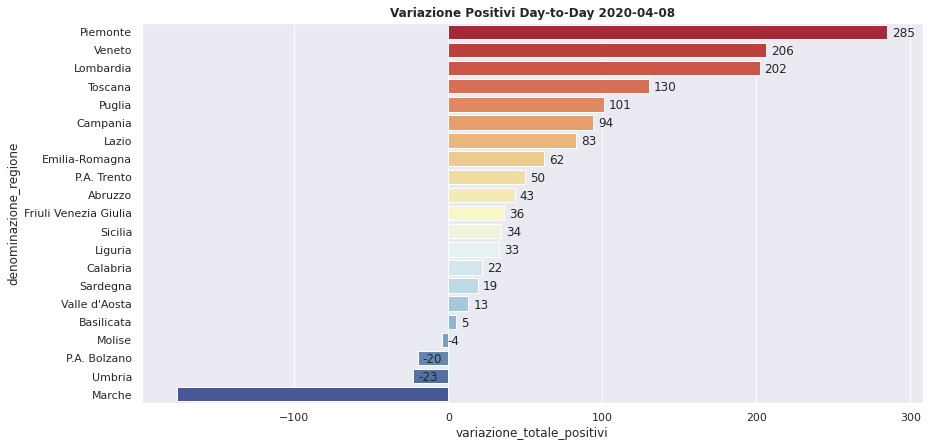

In [364]:
reg_latest.sort_values(by='variazione_totale_positivi', ascending=False, inplace=True)
plt.figure(figsize=(14,7))
plt.title(f'Variazione Positivi Day-to-Day {date.today()}', fontweight='bold')
ax=sns.barplot(data=reg_latest, x='variazione_totale_positivi', palette='RdYlBu', y=reg_latest.denominazione_regione)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 10), textcoords='offset points')

In [0]:
regioni.reset_index(inplace=True)

### Subtotals plots

In [366]:
subtotal_reg = regioni.groupby('data')['variazione_totale_positivi','nuovi_tamponi','nuovi_deceduti', 'totale_casi', 'deceduti', 'nuovi_positivi'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [0]:
subtotal_reg['pct_tamp_pos'] = ((subtotal_reg.nuovi_positivi/subtotal_reg.nuovi_tamponi)*100).round(2)

In [0]:
subtotal_reg.index = pd.to_datetime(subtotal_reg.index, format='%d/%m/%Y')
subtotal_reg.index = subtotal_reg.index.normalize()

In [0]:
subtotal_reg['pct_crescita'] = (subtotal_reg.totale_casi.pct_change()*100).round(2)

In [0]:
subtotal_reg['pct_deceduti'] = (subtotal_reg.deceduti.pct_change()*100).round(2)

In [371]:
subtotal_reg.head()

variazione_totale_positivi  ...  pct_deceduti
data                                    ...              
2020-02-24                           0  ...           NaN
2020-02-25                          90  ...         42.86
2020-02-26                          74  ...         20.00
2020-02-27                         203  ...         41.67
2020-02-28                         233  ...         23.53

[5 rows x 9 columns]

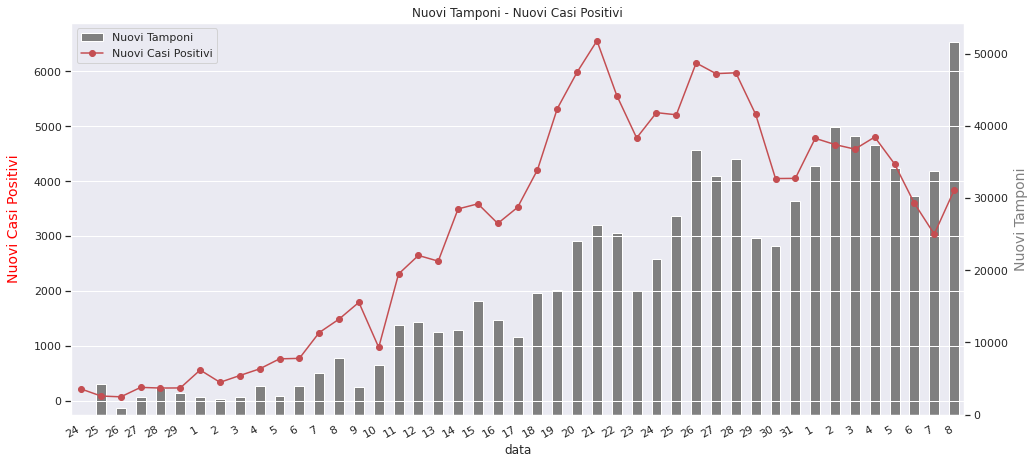

In [372]:
subtotal_reg.index = subtotal_reg.index.day
fig, ax = plt.subplots(figsize=(16,8))
subtotal_reg.nuovi_tamponi.plot(kind='bar', stacked=False, title='Nuovi Tamponi - Nuovi Casi Positivi', 
                           color='grey', ax=ax, grid=False, label='Nuovi Tamponi')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), subtotal_reg.nuovi_positivi.values, linestyle='-', marker='o', 
        color='r', linewidth=1.5, label='Nuovi Casi Positivi')
plt.xticks(rotation=90)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='best')
ax.set_ylabel('Nuovi Casi Positivi', fontsize=14, color='red', labelpad=50)
ax2.set_ylabel('Nuovi Tamponi', fontsize=14, color='grey', labelpad=50)
ax.yaxis.set_ticks_position("right")
ax2.yaxis.set_ticks_position("left")


fig.autofmt_xdate()
plt.show()

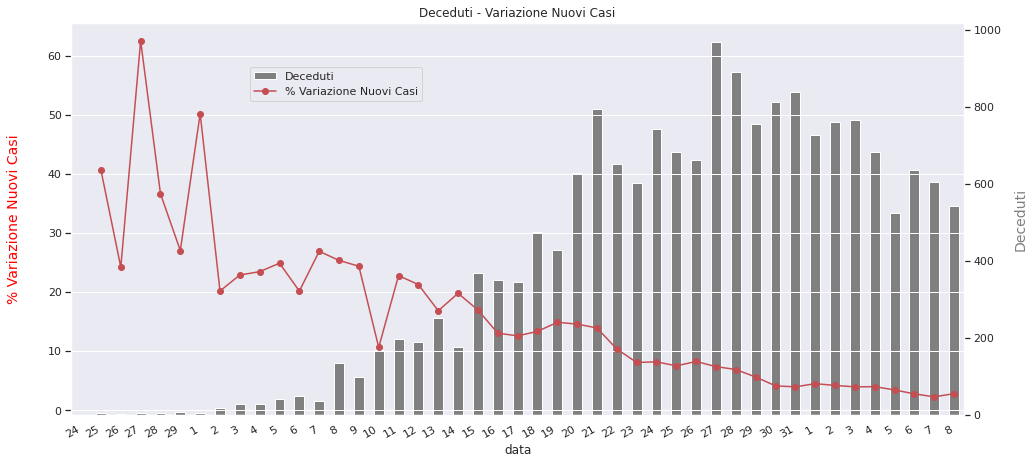

In [373]:


fig, ax = plt.subplots(figsize=(16,8))
subtotal_reg.nuovi_deceduti.plot(kind='bar', stacked=False, title='Deceduti - Variazione Nuovi Casi', 
                           color='grey', ax=ax, grid=False, label='Deceduti')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), subtotal_reg.pct_crescita, linestyle='-', marker='o', 
        color='r', linewidth=1.5, label='% Variazione Nuovi Casi')
plt.xticks(rotation=90)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc=(0.2,0.8))
ax.set_ylabel('% Variazione Nuovi Casi', fontsize=14, color='red', labelpad=50)
ax2.set_ylabel('Deceduti', fontsize=14, color='grey', labelpad=50)
ax.yaxis.set_ticks_position("right")
ax2.yaxis.set_ticks_position("left")


fig.autofmt_xdate()
plt.show()

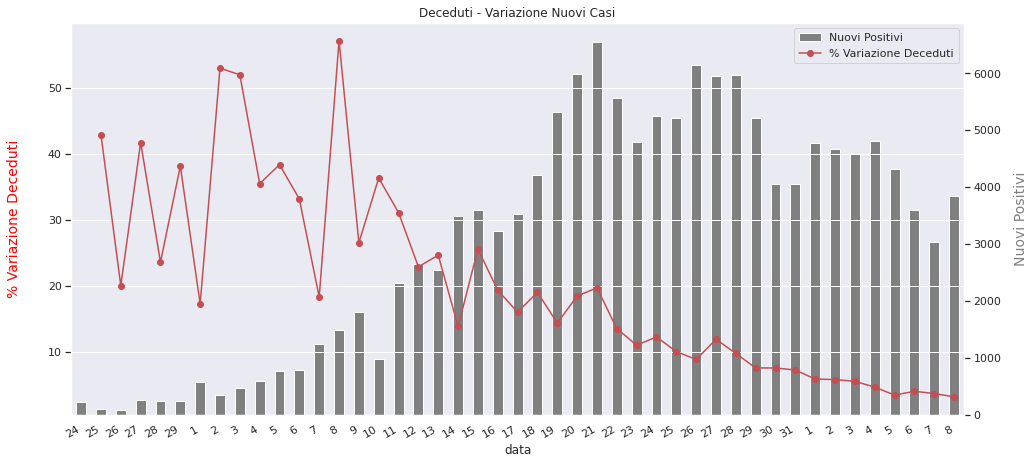

In [374]:

fig, ax = plt.subplots(figsize=(16,8))
subtotal_reg.nuovi_positivi.plot(kind='bar', stacked=False, title='Deceduti - Variazione Nuovi Casi', 
                           color='grey', ax=ax, grid=False, label='Nuovi Positivi')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), subtotal_reg.pct_deceduti, linestyle='-', marker='o', 
        color='r', linewidth=1.5, label='% Variazione Deceduti')
plt.xticks(rotation=90)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='best')
ax.set_ylabel('% Variazione Deceduti', fontsize=14, color='red', labelpad=50)
ax2.set_ylabel('Nuovi Positivi', fontsize=14, color='grey', labelpad=50)
ax.yaxis.set_ticks_position("right")
ax2.yaxis.set_ticks_position("left")


fig.autofmt_xdate()
plt.show()

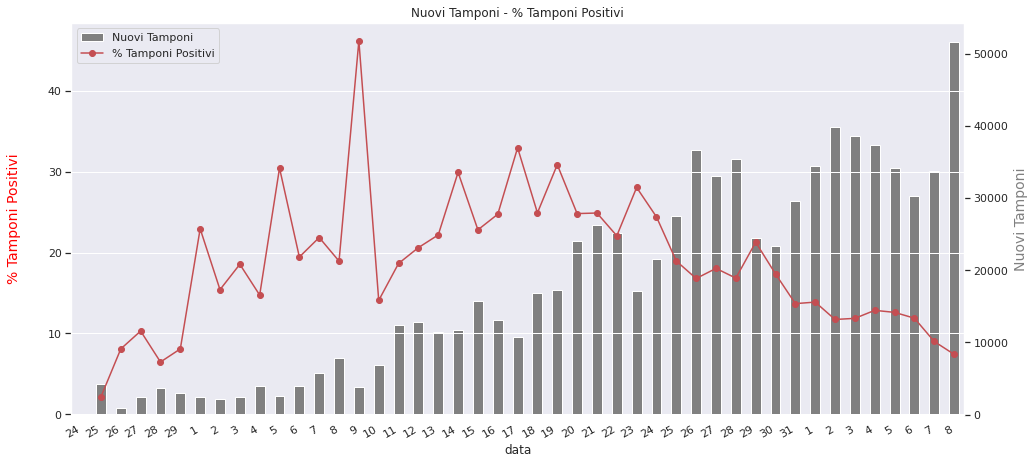

In [375]:

fig, ax = plt.subplots(figsize=(16,8))
subtotal_reg.nuovi_tamponi.plot(kind='bar', stacked=False, title='Nuovi Tamponi - % Tamponi Positivi', 
                           color='grey', ax=ax, grid=False, label='Nuovi Tamponi')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), subtotal_reg.pct_tamp_pos.values, linestyle='-', marker='o', 
        color='r', linewidth=1.5, label='% Tamponi Positivi')
plt.xticks(rotation=90)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='best')
ax.set_ylabel('% Tamponi Positivi', fontsize=14, color='red', labelpad=50)
ax2.set_ylabel('Nuovi Tamponi', fontsize=14, color='grey', labelpad=50)
ax.yaxis.set_ticks_position("right")
ax2.yaxis.set_ticks_position("left")


fig.autofmt_xdate()
plt.show()

### Analysis of Testing (Tamponi)

In [0]:
regioni.set_index('data',inplace=True)
lombardia = regioni[regioni.denominazione_regione == 'Lombardia']
lombardia.index = lombardia.index.date

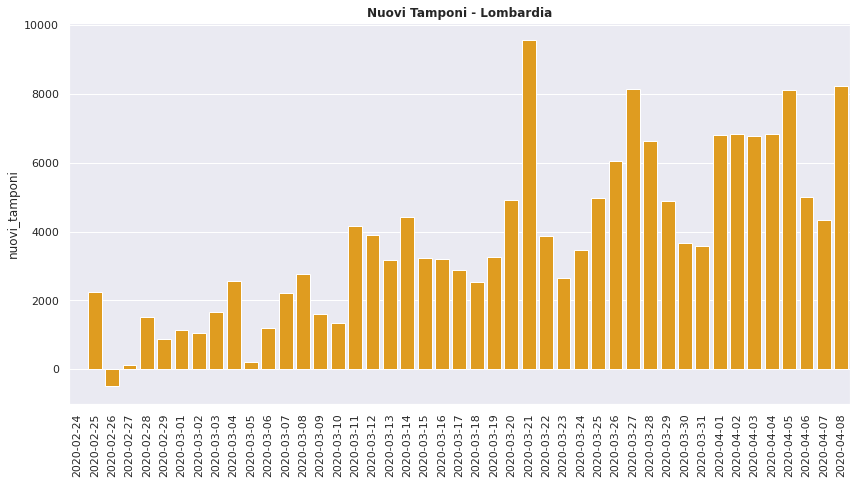

In [377]:
# New daily tests (Lombardia)

plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.title('Nuovi Tamponi - Lombardia', fontweight='bold')
sns.barplot(data=lombardia, x=lombardia.index, y='nuovi_tamponi', color='orange')


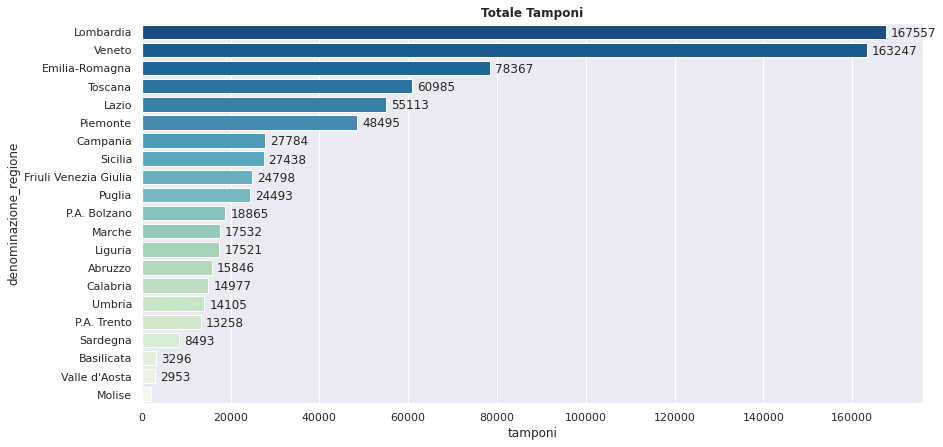

In [378]:
# Total tests carried out by region

reg_latest.sort_values(by='tamponi', ascending=False,inplace=True)
plt.figure(figsize=(14,7))
plt.title('Totale Tamponi', fontweight='bold')
ax=sns.barplot(data=reg_latest, x=reg_latest['tamponi'].astype(int), y=reg_latest.denominazione_regione, palette='GnBu_r')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 10), textcoords='offset points')

In [379]:
pop = pd.read_html('https://www.tuttitalia.it/regioni/popolazione/', encoding='utf-8')
popdf = pd.DataFrame(pop[0])
popdf = popdf[['Regione','Popolazioneresidenti', popdf.columns[4]]]
popdf.set_index('Regione', inplace=True)
popdf.head()

Popolazioneresidenti  Densitàabitanti/km²
Regione                                            
Lombardia           10.060.574                  422
Lazio                5.879.082                  341
Campania             5.801.692                  424
Sicilia              4.999.891                  194
Veneto               4.905.854                  267

In [0]:
popdf.rename(columns={list(popdf)[1]:'densita'}, inplace=True)

In [381]:
reg_merged = reg_latest.merge(right=popdf, how='left', left_on=reg_latest.denominazione_regione, right_on=popdf.index)
reg_merged.rename(columns={'key_0':'Regione'}, inplace=True)
reg_merged.set_index('Regione', drop=True, inplace=True)
reg_merged.head()

stato  codice_regione  ... Popolazioneresidenti  densita
Regione                               ...                              
Lombardia        ITA               3  ...           10.060.574    422.0
Veneto           ITA               5  ...            4.905.854    267.0
Emilia-Romagna   ITA               8  ...            4.459.477    199.0
Toscana          ITA               9  ...            3.729.641    162.0
Lazio            ITA              12  ...            5.879.082    341.0

[5 rows x 23 columns]

In [0]:
# Drop P.A. Bolzano & P.A. Trento due to inconsistency with the region format (They are a province rather than a region)
# Drop "note" columns
# Column Popolazioneresidenti has dtype string. Need to remove "." and convert to_numeric

reg_merged.drop([reg_merged.index[16], reg_merged.index[11]], inplace=True)
reg_merged.dropna(how='all', axis=1, inplace=True)
reg_merged.Popolazioneresidenti = pd.to_numeric(reg_merged.Popolazioneresidenti.str.replace('.',''))

In [383]:
reg_merged.nuovi_tamponi.sum()

49539.0

In [0]:
 reg_merged['Tamponi_x_1000_Abitanti'] = ((reg_merged.tamponi/reg_merged.Popolazioneresidenti)*1000).round(1)

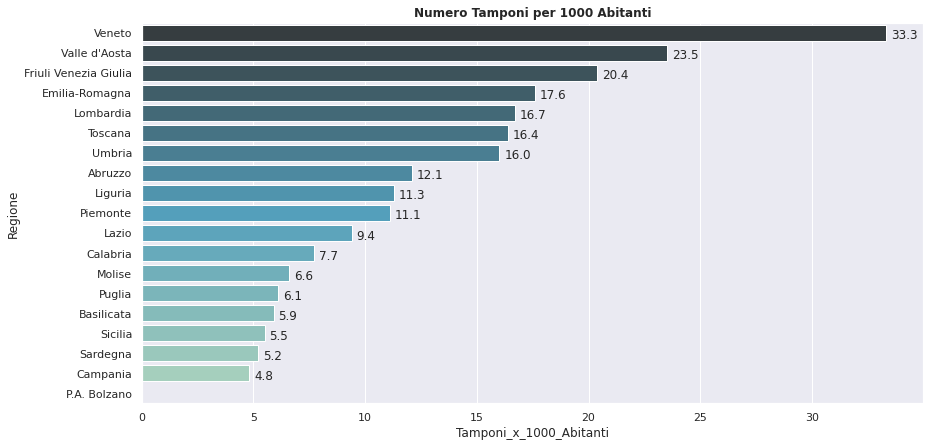

In [385]:
reg_merged.sort_values(by='Tamponi_x_1000_Abitanti', ascending=False, inplace=True)
plt.figure(figsize=(14,7))
plt.title('Numero Tamponi per 1000 Abitanti', fontweight='bold')
ax=sns.barplot(data=reg_merged, x='Tamponi_x_1000_Abitanti', y=reg_merged.index, palette='GnBu_d')
for p in ax.patches:
    ax.annotate("%.1f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 10), textcoords='offset points')

In [386]:
reg_merged.head()

stato  codice_regione  ... densita  Tamponi_x_1000_Abitanti
Regione                                      ...                                 
Veneto                  ITA               5  ...   267.0                     33.3
Valle d'Aosta           ITA               2  ...    39.0                     23.5
Friuli Venezia Giulia   ITA               6  ...   153.0                     20.4
Emilia-Romagna          ITA               8  ...   199.0                     17.6
Lombardia               ITA               3  ...   422.0                     16.7

[5 rows x 22 columns]

So far I have:
1. regioni: df with all the original data and datetime index
2. reg_latest: df with the data from the latest timestamp
3. reg_merged: reg_latest with population and density data




In [387]:
regioni.head(3)

stato  codice_regione  ... nuovi_deceduti  pct_nuovi_pos
data                                       ...                              
2020-02-24 18:00:00   ITA              13  ...            NaN            NaN
2020-02-24 18:00:00   ITA              17  ...            NaN            NaN
2020-02-24 18:00:00   ITA               4  ...            NaN            NaN

[3 rows x 21 columns]

In [0]:
reg_merged['nuovi_contagiati_nuovi_tamponi'] = (reg_merged.nuovi_positivi/reg_merged.nuovi_tamponi)*100

In [389]:
reg_merged.head(2)

stato  ...  nuovi_contagiati_nuovi_tamponi
Regione              ...                                
Veneto          ITA  ...                        4.997424
Valle d'Aosta   ITA  ...                        7.537688

[2 rows x 23 columns]

In [0]:
reg_merged['nuovi_tamponi_x_1000'] = (reg_merged.nuovi_tamponi/reg_merged.Popolazioneresidenti)*1000


In [391]:
reg_merged.head(2)

stato  ...  nuovi_tamponi_x_1000
Regione              ...                      
Veneto          ITA  ...              1.978249
Valle d'Aosta   ITA  ...              1.583563

[2 rows x 24 columns]

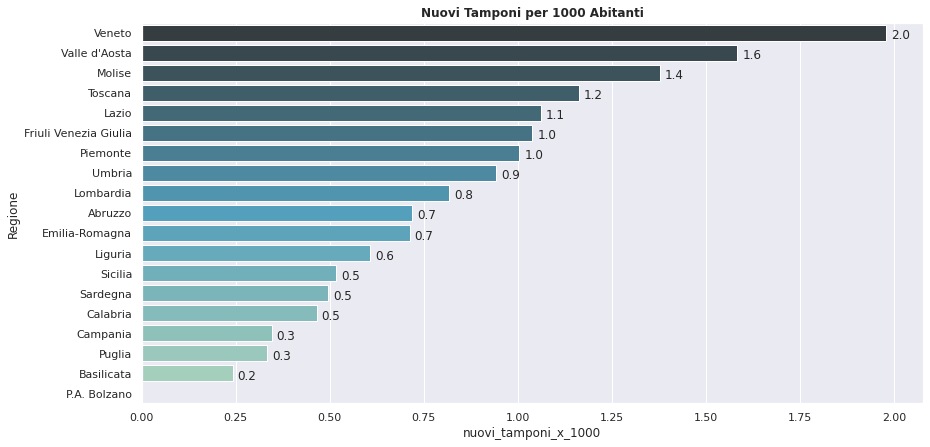

In [392]:
reg_merged.sort_values(by='nuovi_tamponi_x_1000', ascending=False, inplace=True)
plt.figure(figsize=(14,7))
plt.title('Nuovi Tamponi per 1000 Abitanti', fontweight='bold')
ax=sns.barplot(data=reg_merged, x='nuovi_tamponi_x_1000', y=reg_merged.index, palette='GnBu_d')
for p in ax.patches:
    ax.annotate("%.1f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 10), textcoords='offset points')

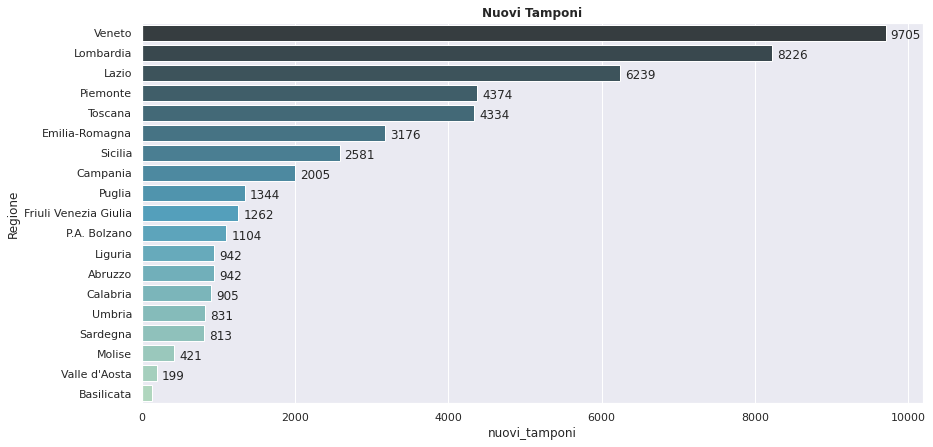

In [393]:
reg_merged.sort_values(by='nuovi_tamponi', ascending=False, inplace=True)
plt.figure(figsize=(14,7))
plt.title('Nuovi Tamponi', fontweight='bold')
ax=sns.barplot(data=reg_merged, x='nuovi_tamponi', y=reg_merged.index, palette='GnBu_d')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 10), textcoords='offset points')

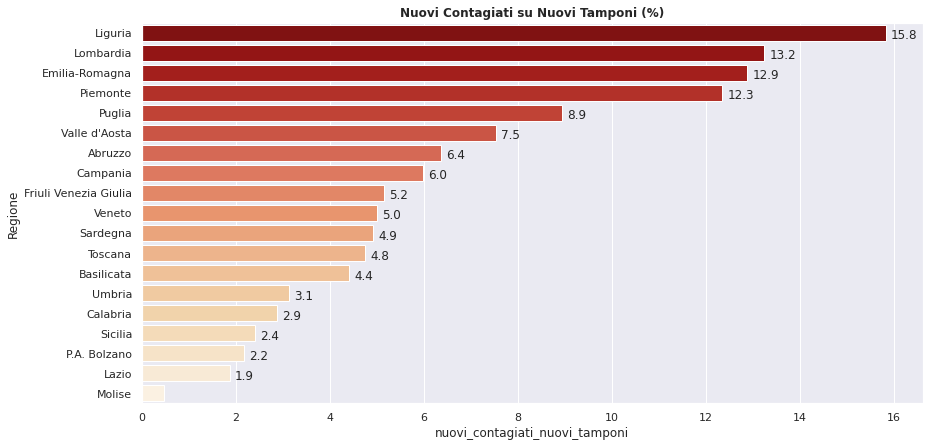

In [394]:
reg_merged.sort_values(by='nuovi_contagiati_nuovi_tamponi', ascending=False, inplace=True)
plt.figure(figsize=(14,7))
plt.title('Nuovi Contagiati su Nuovi Tamponi (%)', fontweight='bold')
ax=sns.barplot(data=reg_merged, x='nuovi_contagiati_nuovi_tamponi', y=reg_merged.index, palette='OrRd_r')
for p in ax.patches:
    ax.annotate("%.1f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 10), textcoords='offset points')

In [395]:
reg_merged.nuovi_tamponi.sum()

49539.0

### Hospitalisations and ICU data

In [396]:
regioni.head()

stato  codice_regione  ... nuovi_deceduti  pct_nuovi_pos
data                                       ...                              
2020-02-24 18:00:00   ITA              13  ...            NaN            NaN
2020-02-24 18:00:00   ITA              17  ...            NaN            NaN
2020-02-24 18:00:00   ITA               4  ...            NaN            NaN
2020-02-24 18:00:00   ITA              18  ...            NaN            NaN
2020-02-24 18:00:00   ITA              15  ...            NaN            NaN

[5 rows x 21 columns]

In [0]:
# Obtaining deltas in hospitalisation and home-isolation quantities. Adding columns to Regioni


regioni['delta_osp'] = regioni.groupby('denominazione_regione')['totale_ospedalizzati'].transform(lambda x: x.diff())
regioni['delta_ti'] = regioni.groupby('denominazione_regione')['terapia_intensiva'].transform(lambda x: x.diff())
regioni['delta_iso'] = regioni.groupby('denominazione_regione')['isolamento_domiciliare'].transform(lambda x: x.diff())

In [0]:
regioni.reset_index(inplace=True)

In [0]:
regioni_mi = regioni.set_index(['data','denominazione_regione'])

In [400]:
reg_latest = regioni_mi.loc[[regioni_mi.index.get_level_values(0)[-1]]]
reg_latest.head()

stato  ...  delta_iso
data                denominazione_regione        ...           
2020-04-08 17:00:00 Abruzzo                 ITA  ...       54.0
                    Basilicata              ITA  ...        4.0
                    P.A. Bolzano            ITA  ...       36.0
                    Calabria                ITA  ...       20.0
                    Campania                ITA  ...       95.0

[5 rows x 23 columns]

In [401]:
reg_latest['dummy_osp'] = reg_latest['delta_osp'] > 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



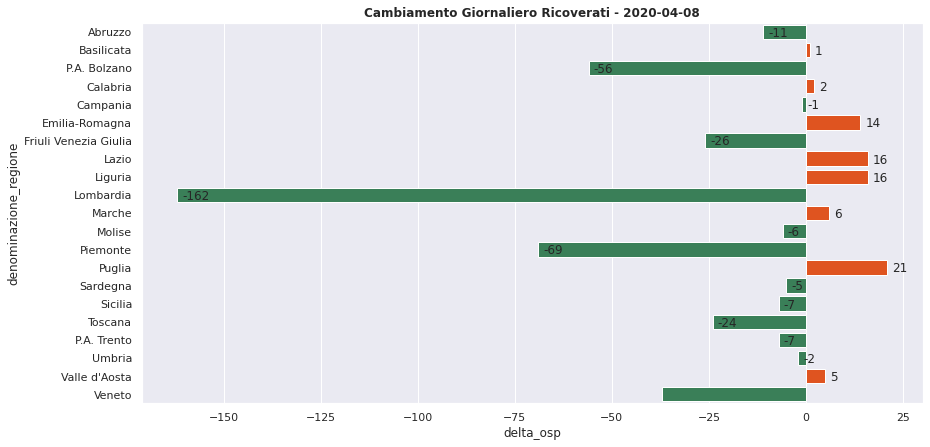

In [402]:
plt.figure(figsize=(14,7))
plt.title(f'Cambiamento Giornaliero Ricoverati - {date.today()}', fontweight='bold')
ax = sns.barplot(data = reg_latest, x='delta_osp', y=reg_latest.index.get_level_values(1), palette=(reg_latest['delta_osp'] > 0).map({True:'orangered',False:'seagreen'}))
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 10), textcoords='offset points')

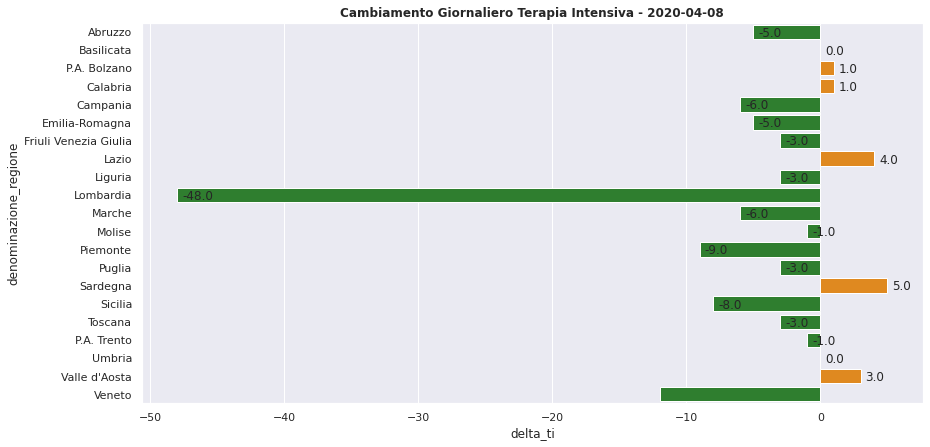

In [403]:
plt.figure(figsize=(14,7))
plt.title(f'Cambiamento Giornaliero Terapia Intensiva - {date.today()}', fontweight='bold')
ax=sns.barplot(data = reg_latest, x='delta_ti', y=reg_latest.index.get_level_values(1), color='orange', palette=(reg_latest['delta_ti'] > 0).map({True:'darkorange',False:'forestgreen'}))
for p in ax.patches:
    ax.annotate("%.1f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 10), textcoords='offset points')

In [404]:
reg_merged.head()

stato  ...  nuovi_tamponi_x_1000
Regione               ...                      
Liguria          ITA  ...              0.607491
Lombardia        ITA  ...              0.817647
Emilia-Romagna   ITA  ...              0.712191
Piemonte         ITA  ...              1.004039
Puglia           ITA  ...              0.333577

[5 rows x 24 columns]

In [0]:
# Percentage of cases in hospital



reg_merged['perc_ospedalizzati'] = ((reg_merged.totale_ospedalizzati/reg_merged.totale_positivi)*100).round(1)
reg_merged['perc_ti'] = ((reg_merged.terapia_intensiva/reg_merged.totale_positivi)*100).round(1)


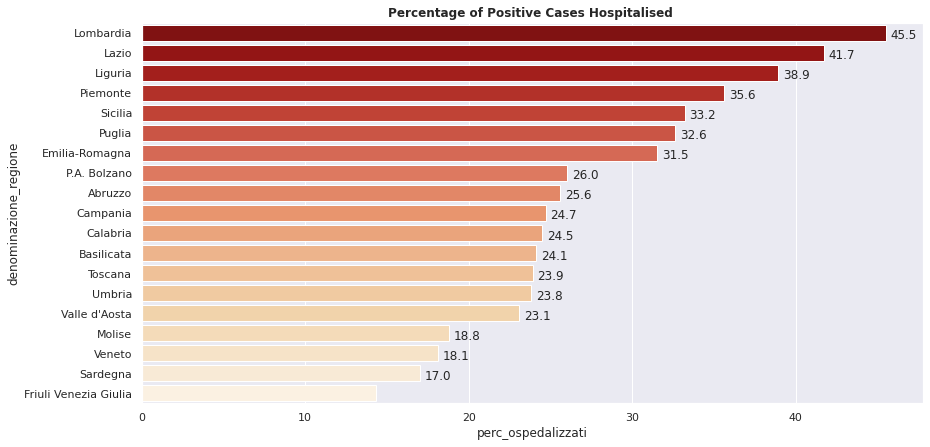

In [406]:
plt.figure(figsize=(14,7))
plt.title('Percentage of Positive Cases Hospitalised ', fontweight='bold')

ax=sns.barplot(data=reg_merged.sort_values(by='perc_ospedalizzati', ascending=False), y='denominazione_regione', x='perc_ospedalizzati', palette='OrRd_r')
for p in ax.patches:
    ax.annotate("%.1f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.2),
                xytext=(5, 10), textcoords='offset points')

### Further Region Analysis - Daily Growth

In [407]:
regioni.set_index('data',inplace=True)
regioni.tail(20)

stato  codice_regione  ... delta_ti  delta_iso
data                                       ...                    
2020-04-08 17:00:00   ITA              17  ...      0.0        4.0
2020-04-08 17:00:00   ITA               4  ...      1.0       36.0
2020-04-08 17:00:00   ITA              18  ...      1.0       20.0
2020-04-08 17:00:00   ITA              15  ...     -6.0       95.0
2020-04-08 17:00:00   ITA               8  ...     -5.0       48.0
2020-04-08 17:00:00   ITA               6  ...     -3.0       62.0
2020-04-08 17:00:00   ITA              12  ...      4.0       67.0
2020-04-08 17:00:00   ITA               7  ...     -3.0       17.0
2020-04-08 17:00:00   ITA               3  ...    -48.0      364.0
2020-04-08 17:00:00   ITA              11  ...     -6.0     -182.0
2020-04-08 17:00:00   ITA              14  ...     -1.0        2.0
2020-04-08 17:00:00   ITA               1  ...     -9.0      354.0
2020-04-08 17:00:00   ITA              16  ...     -3.0       80.0
2020-04-08 17:00:00   ITA              20  ...      5.0       24.0
2020-04-08 17:00:00   ITA              19  ...     -8.0       41.0
2020-04-08 17:00:00   ITA               9  ...     -3.0      154.0
2020-04-08 17:00:00   ITA               4  ...     -1.0       57.0
2020-04-08 17:00:00   ITA              10  ...      0.0      -21.0
2020-04-08 17:00:00   ITA               2  ...      3.0        8.0
2020-04-08 17:00:00   ITA               5  ...    -12.0      243.0

[20 rows x 24 columns]

### Recoveries vs New Cases

In [408]:
regioni

stato  codice_regione  ... delta_ti  delta_iso
data                                       ...                    
2020-02-24 18:00:00   ITA              13  ...      NaN        NaN
2020-02-24 18:00:00   ITA              17  ...      NaN        NaN
2020-02-24 18:00:00   ITA               4  ...      NaN        NaN
2020-02-24 18:00:00   ITA              18  ...      NaN        NaN
2020-02-24 18:00:00   ITA              15  ...      NaN        NaN
...                   ...             ...  ...      ...        ...
2020-04-08 17:00:00   ITA               9  ...     -3.0      154.0
2020-04-08 17:00:00   ITA               4  ...     -1.0       57.0
2020-04-08 17:00:00   ITA              10  ...      0.0      -21.0
2020-04-08 17:00:00   ITA               2  ...      3.0        8.0
2020-04-08 17:00:00   ITA               5  ...    -12.0      243.0

[945 rows x 24 columns]

### Trials for Ideas

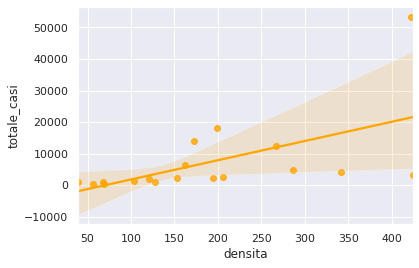

In [409]:

sns.regplot(data=reg_merged, x='densita', y='totale_casi', color='orange')

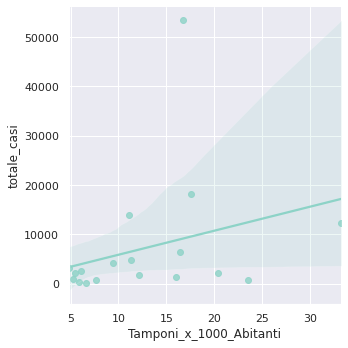

In [410]:
sns.lmplot(data=reg_merged, x='Tamponi_x_1000_Abitanti', y='totale_casi')

In [411]:
pd.read_html('https://it.qwe.wiki/wiki/List_of_Italian_regions_by_GDP#Per_capita_GDP')[0]

Rango                Regione  ...       2016 % Della Nazione
0      1              Lombardia  ...    366.541           21.81
1      2                  Lazio  ...    185.935           11.06
2      3                 Veneto  ...    155.515            9.25
3      4         Emilia-Romagna  ...    153.997            9.16
4      5               Piemonte  ...    129.322            7.70
5      6                Toscana  ...    112.239            6.68
6      7               Campania  ...    106.753            6.35
7      8                Sicilia  ...     86.998            5.18
8      9                 Puglia  ...     72.406            4.31
9     10                Liguria  ...     48.287          287.00
10     -    Trentino-Alto Adige  ...     43.613            2.60
11    11                 Marche  ...     40.988            2.44
12    12  Friuli-Venezia Giulia  ...     36.935            2.20
13    13               Sardegna  ...     33.556            2.00
14    14               Calabria  ...     33.054            1.97
15    15                Abruzzo  ...     31.959            1.90
16    16             Alto Adige  ...     22.272            1.33
17    17                 Umbria  ...     21.341            1.27
18    18               Trentino  ...     18.832            1.12
19    19             Basilicata  ...     11.782           70.00
20    20                 Molise  ...      6.233            0.37
21    21          Valle d'Aosta  ...      4.436            0.26
22     -                 Italia  ...  1.680.520          100.00

[23 rows x 20 columns]

In [412]:
pd.read_html('https://it.wikipedia.org/wiki/Regioni_d%27Italia')[4]

Regione o macroregione  ... PIL Pro capite (macroregione = 100)
0              Nord-ovest  ...                                   -
1                Piemonte  ...                                 856
2           Valle d'Aosta  ...                                 994
3                 Liguria  ...                                 838
4               Lombardia  ...                                1079
5                Nord-est  ...                                   -
6              Alto Adige  ...                                1233
7                Trentino  ...                                1052
8                  Veneto  ...                                 964
9   Friuli-Venezia Giulia  ...                                 904
10         Emilia-Romagna  ...                                1029
11                 Centro  ...                                   -
12                Toscana  ...                                 993
13                 Umbria  ...                                 791
14                 Marche  ...                                 865
15                  Lazio  ...                                1071
16            Sud e isole  ...                                   -
17                Abruzzo  ...                                1319
18                 Molise  ...                                1054
19               Campania  ...                                 985
20                 Puglia  ...                                 974
21             Basilicata  ...                                1125
22               Calabria  ...                                 924
23                Sicilia  ...                                 941
24               Sardegna  ...                                1097
25                 Italia  ...                                 100

[26 rows x 5 columns]

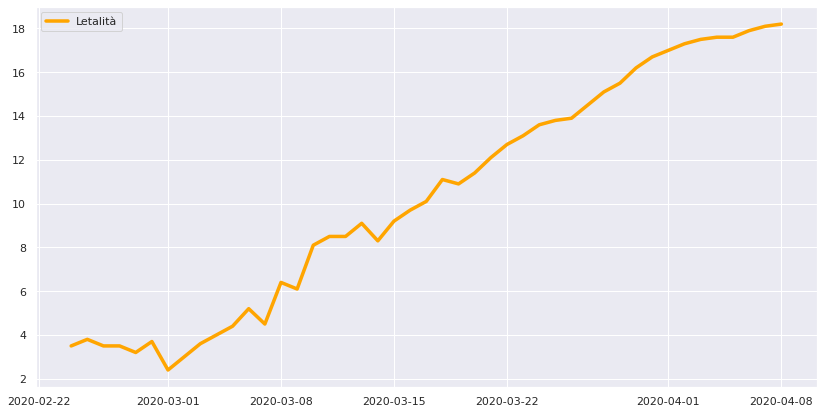

In [413]:
plt.figure(figsize=(14,7))

sns.set()
sns.lineplot(data=lombardia, x=lombardia.index, y=((lombardia.deceduti/lombardia.totale_casi)*100).round(1), color='orange', markers=True, lw=3.5, label='Letalità')


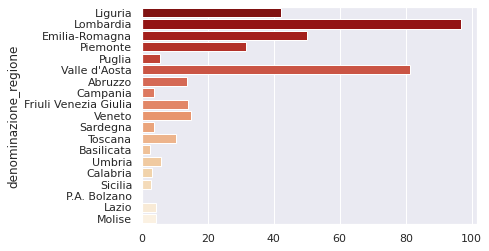

In [414]:
sns.barplot(data=reg_merged, x=((reg_merged.deceduti/reg_merged.Popolazioneresidenti)*100000).round(1).sort_values(ascending=False), y='denominazione_regione', palette='OrRd_r')